In [89]:
import pandas as pd
import numpy as np

In [70]:
from sktime.utils.plotting import plot_series

In [71]:
file_path = "D:/Techlabs/Food prices transposed.xlsx"

df = pd.read_excel(file_path)

In [72]:
df.head()

,TIME,Germany
0,1996-01,74.9
1,1996-02,75.5
2,1996-03,76.1
3,1996-04,76.4
4,1996-05,76.2


In [75]:
index=df["TIME"]
print(index)
df=df.set_index(index)
print(df)

0      1996-01
1      1996-02
2      1996-03
3      1996-04
4      1996-05
        ...   
307    2021-08
308    2021-09
309    2021-10
310    2021-11
311    2021-12
Name: TIME, Length: 312, dtype: object
            TIME  Germany
TIME                     
1996-01  1996-01     74.9
1996-02  1996-02     75.5
1996-03  1996-03     76.1
1996-04  1996-04     76.4
1996-05  1996-05     76.2
...          ...      ...
2021-08  2021-08    114.2
2021-09  2021-09    114.2
2021-10  2021-10    114.2
2021-11  2021-11    114.8
2021-12  2021-12    116.0

[312 rows x 2 columns]


In [81]:
df=df.drop("TIME",axis=1)

In [82]:
print(df)

         Germany
TIME            
1996-01     74.9
1996-02     75.5
1996-03     76.1
1996-04     76.4
1996-05     76.2
...          ...
2021-08    114.2
2021-09    114.2
2021-10    114.2
2021-11    114.8
2021-12    116.0

[312 rows x 1 columns]


In [85]:
df.index

Index(['1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10',
       ...
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12'],
      dtype='object', name='TIME', length=312)

In [86]:
df.index = pd.PeriodIndex(df.index, freq='M')
df.index

PeriodIndex(['1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
             '1996-07', '1996-08', '1996-09', '1996-10',
             ...
             '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
             '2021-09', '2021-10', '2021-11', '2021-12'],
            dtype='period[M]', name='TIME', length=312)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

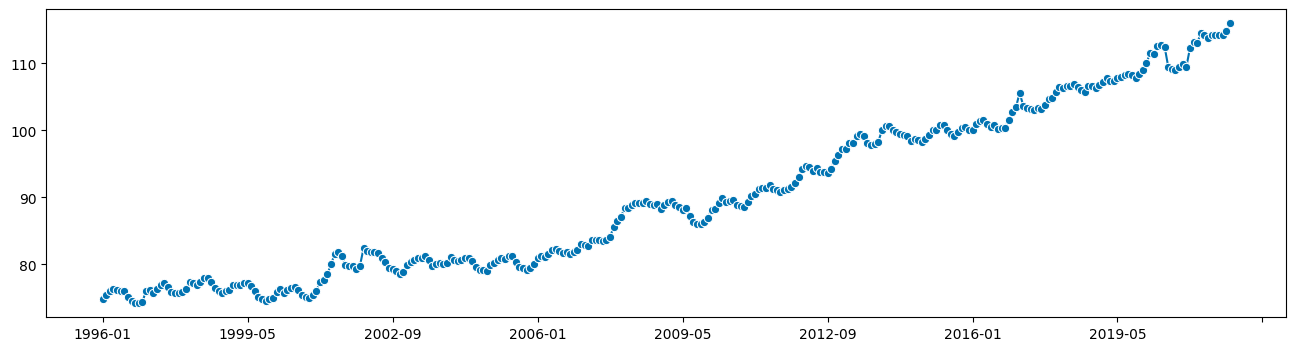

In [87]:
plot_series(df)

In [110]:
#import of forecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

# step 1: data specification
#done

# step 2: specifying forecasting horizon
fh = np.arange(1, 120)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=120)

# step 4: fitting the forecaster
forecaster.fit(df)

# step 5: querying predictions
df_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

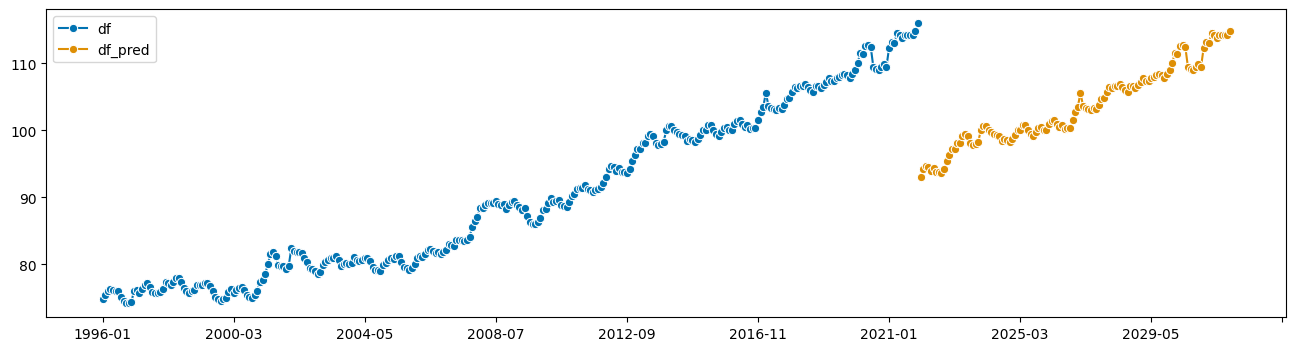

In [111]:
plot_series(df, df_pred, labels=["df", "df_pred"])

In [112]:
# Calculate the difference between consecutive rows along the index
df_diff = df.diff()

# Drop the first row, as it will have NaN values (no previous row to calculate difference)
df_diff = df_diff.dropna()

# Print the DataFrame with the differences
print(df_diff)

         Germany
1996-02      0.6
1996-03      0.6
1996-04      0.3
1996-05     -0.2
1996-06     -0.1
...          ...
2021-08      0.0
2021-09      0.0
2021-10      0.0
2021-11      0.6
2021-12      1.2

[311 rows x 1 columns]


In [114]:
# step 1: data specification
#done

# step 2: specifying forecasting horizon
fh = np.arange(1, 120)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=120)

# step 4: fitting the forecaster
forecaster.fit(df_diff)

# step 5: querying predictions
df_diff_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

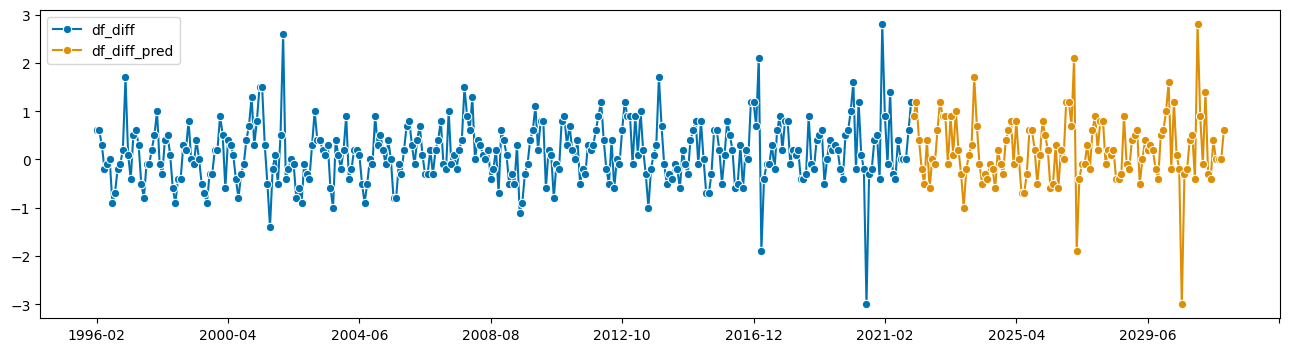

In [115]:
plot_series(df_diff, df_diff_pred, labels=["df_diff", "df_diff_pred"])

In [118]:
df_pred_absolute = df_diff_pred.cumsum()
# Get the last value of df
last_value = df.iloc[-1, 0]

# Add the last value of df to every value in df_pred_absolute
df_pred_absolute = df_pred_absolute.add(last_value)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

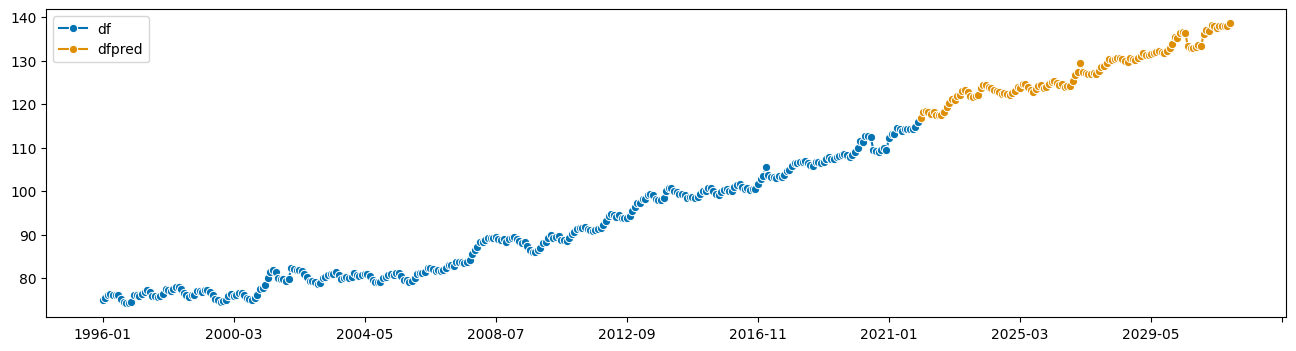

In [119]:
plot_series(df, df_pred_absolute, labels=["df", "dfpred"])

In [120]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [126]:
df_train, df_test = temporal_train_test_split(df, test_size=36)

In [127]:
# Calculate the difference between consecutive rows along the index
df_diff_train = df_train.diff()

# Drop the first row, as it will have NaN values (no previous row to calculate difference)
df_diff_train = df_diff_train.dropna()

In [131]:
# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(df_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(df_diff_train)

# y_pred will contain the predictions
df_diff_pred = forecaster.predict(fh)

In [134]:
df_pred_absolute = df_diff_pred.cumsum()
# Get the last value of df
last_value = df.iloc[-36, 0]

# Add the last value of df to every value in df_pred_absolute
df_pred_absolute = df_pred_absolute.add(last_value)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

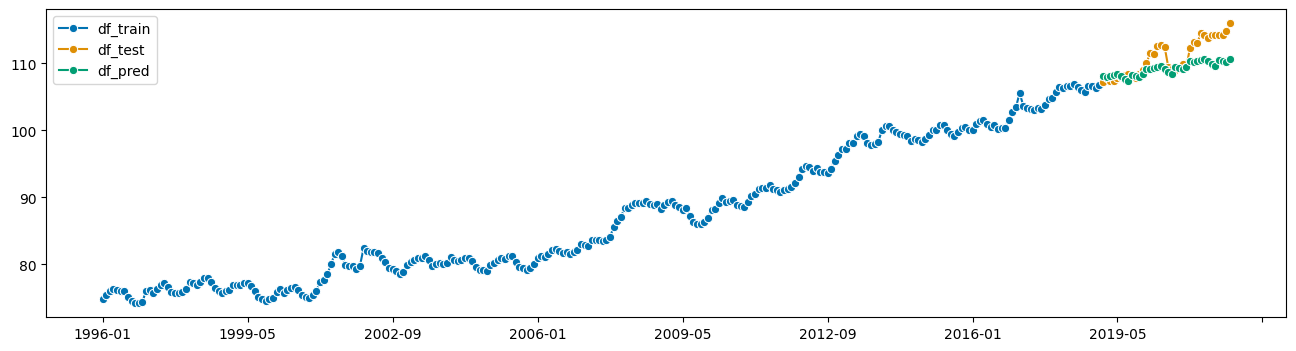

In [135]:
# plotting for illustration
plot_series(df_train, df_test, df_pred_absolute, labels=["df_train", "df_test", "df_pred"])

In [140]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError,MeanSquaredPercentageError 

In [137]:
# option 2: using the composable class interface
mape = MeanAbsolutePercentageError(symmetric=False)
# the class interface allows to easily construct variants of the MAPE
#  e.g., the non-symmetric verion
# it also allows for inspection of metric properties
#  e.g., are higher values better (answer: no)?
mape.get_tag("lower_is_better")

True

In [138]:
mape(df_test, df_pred_absolute)

0.017013489731729992

In [141]:
# option 2: using the composable class interface
mspe = MeanSquaredPercentageError(symmetric=False)
# the class interface allows to easily construct variants of the MAPE
#  e.g., the non-symmetric verion
# it also allows for inspection of metric properties
#  e.g., are higher values better (answer: no)?
mspe.get_tag("lower_is_better")

True

In [142]:
mspe(df_test, df_pred_absolute)

0.00048775656164869706